## Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

### Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
### Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('water.csv')
df = df[['location', 'town', 'mortality', 'hardness']]
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

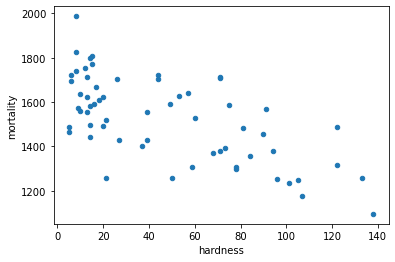

In [9]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [10]:
# Коэффициент корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [11]:
# Коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [12]:
# Коэффициент корреляции Кэнделла
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df[['hardness']]
y = df['mortality']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [15]:
print(x_train.shape, y_train.shape)

(48, 1) (48,)


In [16]:
y_train.shape

(48,)

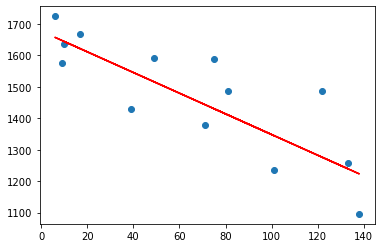

In [18]:
model = LinearRegression()
model.fit(x_train, y_train)

model.coef_
model.intercept_

y_pred = model.predict(x_test)
y_pred

# модель детерминации
model.score(x_test, y_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

Наблюдается обратная корреляция. Чем вода жестче, тем меньше смертность и наоборот, чем меньше жестность воды, тем больше 
cмертность. Правда построенная модель далека от идеальной (плюс очень большое количество остатков), 
следовательно прямой зависимости жесткости воды к смертности нет, явно есть еще параметры, влияющие на смертность.

In [19]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [20]:
x_const = sm.add_constant(x_train) # добавляем константу руками
x_const.shape

(48, 2)

In [21]:
model = sm.OLS(y_train, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     25.02
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           8.74e-06
Time:                        17:32:43   Log-Likelihood:                -308.36
No. Observations:                  48   AIC:                             620.7
Df Residuals:                      46   BIC:                             624.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1676.8049     35.412     47.352      0.0

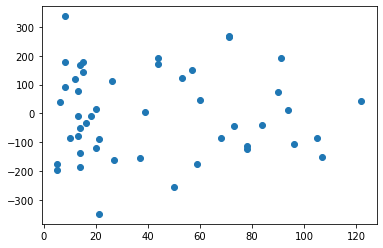

In [22]:
plt.scatter(x_const.iloc[:, 1], results.resid)

### Разброс остатков хаотичен

(array([ 1.,  1.,  7., 10.,  6.,  6.,  6.,  8.,  1.,  2.]),
 array([-347.7790831 , -279.35211037, -210.92513764, -142.49816491,
         -74.07119217,   -5.64421944,   62.78275329,  131.20972602,
         199.63669875,  268.06367149,  336.49064422]),
 <BarContainer object of 10 artists>)

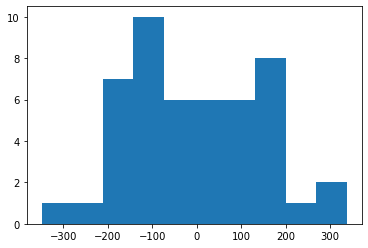

In [23]:
plt.hist(results.resid)

Задание 2
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

### Юг

In [24]:
filter_south = df['location'] == 'South'
filter_south = df.loc[filter_south].reset_index()
filter_south

,index,location,town,mortality,hardness
0,0,South,Bath,1247,105
1,2,South,Birmingham,1466,5
2,7,South,Bournemouth,1299,78
3,9,South,Brighton,1359,84
4,10,South,Bristol,1392,73
5,12,South,Cardiff,1519,21
6,13,South,Coventry,1307,78
7,14,South,Croydon,1254,96
8,18,South,East Ham,1318,122
9,19,South,Exeter,1260,21


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

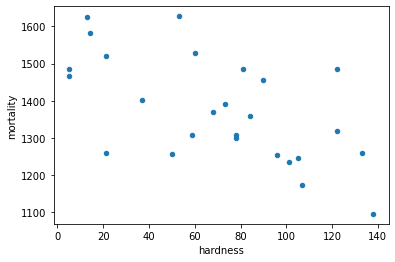

In [25]:
filter_south.plot(kind='scatter', x='hardness', y='mortality')

In [26]:
# Коэффициент корреляции Пирсона 
# он уменьшился на 0,05
filter_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [27]:
# Коэффициент корреляции Спирмена 
# также наблюдается снижение коэф. корреляции
filter_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [28]:
# Коэффициент корреляции Кэнделла
filter_south[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [29]:
xs = filter_south[['hardness']]
ys = filter_south['mortality']

xs_train, xs_test, ys_train, ys_test = train_test_split(x, y, test_size=0.30, random_state=50)

model_s = LinearRegression()
model_s.fit(xs_train, ys_train)
model_s.coef_
model_s.intercept_

ys_pred = model_s.predict(xs_test)

model_s.score(xs_test, ys_test)

0.5403737075686553

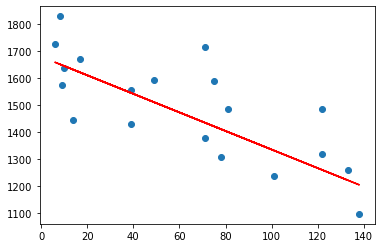

In [30]:
plt.scatter(xs_test, ys_test)
plt.plot(xs_test, ys_pred, c='r')

### В первоначальном анализе датасета похожая картина. Остатки также визуально похожи

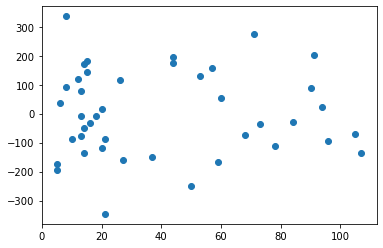

In [31]:
xs_const = sm.add_constant(xs_train)
model_s = sm.OLS(ys_train, xs_const)
results_s = model_s.fit()

plt.scatter(xs_const.iloc[:, 1], results_s.resid)

(array([1., 1., 5., 9., 7., 4., 6., 6., 1., 2.]),
 array([-346.08762502, -277.85956146, -209.6314979 , -141.40343434,
         -73.17537078,   -4.94730722,   63.28075634,  131.5088199 ,
         199.73688345,  267.96494701,  336.19301057]),
 <BarContainer object of 10 artists>)

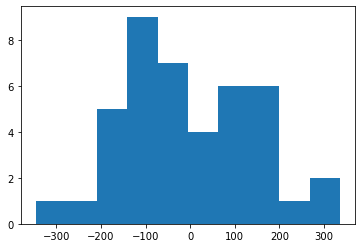

In [32]:
plt.hist(results_s.resid)

### Север

In [33]:
filter_North = df['location'] == 'North'
filter_North = df.loc[filter_North].reset_index()
filter_North

,index,location,town,mortality,hardness
0,1,North,Birkenhead,1668,17
1,3,North,Blackburn,1800,14
2,4,North,Blackpool,1609,18
3,5,North,Bolton,1558,10
4,6,North,Bootle,1807,15
5,8,North,Bradford,1637,10
6,11,North,Burnley,1755,12
7,15,North,Darlington,1491,20
8,16,North,Derby,1555,39
9,17,North,Doncaster,1428,39


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

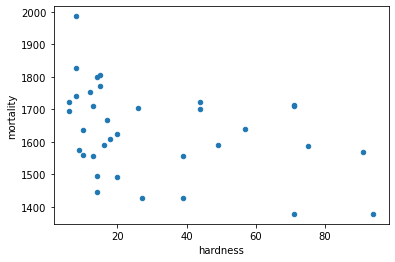

In [34]:
filter_North.plot(kind='scatter', x='hardness', y='mortality')

In [35]:
# Коэффициент корреляции Пирсона
filter_North[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [36]:

# Коэффициент корреляции Спирмена
# также наблюдается уменьшение коэф. корреляции
filter_North[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [37]:
# Коэффициент корреляции Кэнделла
filter_North[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [38]:
xn = filter_North[['hardness']]
yn = filter_North['mortality']

xn_train, xn_test, yn_train, yn_test = train_test_split(x, y, test_size=0.30, random_state=50)

model_n = LinearRegression()
model_n.fit(xn_train, yn_train)
model_n.coef_
model_n.intercept_

yn_pred = model_n.predict(xn_test)

model_n.score(xn_test, yn_test)

0.5403737075686553

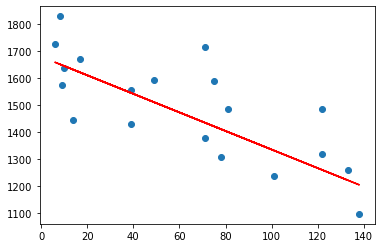

In [39]:
plt.scatter(xn_test, yn_test)
plt.plot(xn_test, yn_pred, c='r')

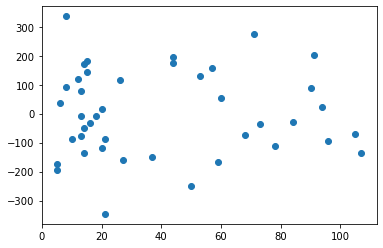

In [40]:
xn_const = sm.add_constant(xn_train) 
model_n = sm.OLS(yn_train, xn_const)
results_n = model_n.fit()

plt.scatter(xn_const.iloc[:, 1], results_n.resid)

(array([1., 1., 5., 9., 7., 4., 6., 6., 1., 2.]),
 array([-346.08762502, -277.85956146, -209.6314979 , -141.40343434,
         -73.17537078,   -4.94730722,   63.28075634,  131.5088199 ,
         199.73688345,  267.96494701,  336.19301057]),
 <BarContainer object of 10 artists>)

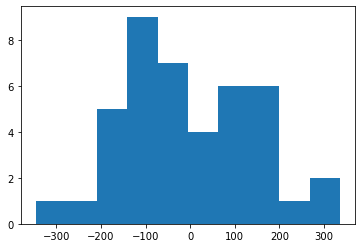

In [41]:
plt.hist(results_n.resid)

После разделения данных на две группы, на северные населенные пункты и южные, подтвердился факт зависимости (хоть и не явной) 
жесткости воды на смертность населения. Корреляция двух групп также повторяет первоначальный вид (обратная).